In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#PYCARET INSTALLATION AND DATASET EXTRACTION

In [59]:
from google.colab import files
import pandas as pd
# Upload the file
uploaded = files.upload()


Saving Wholesale customers data.csv to Wholesale customers data (9).csv


In [ ]:
filename = list(uploaded.keys())[0]
filename

In [ ]:
# Load the dataset (replace 'your_file.csv' with the name of your file)
p = pd.read_csv(filename)



In [ ]:
p

#KMEANS CLUSTERING

In [ ]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(p)

#WITHOUT PREPROCESSING

In [61]:
KMeanCluster = create_model('kmeans', num_clusters=3)
KMeanCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4630,203.7995,0.8905,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=3, random_state=159)

In [62]:
KMeanCluster = create_model('kmeans', num_clusters=4)
KMeanCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4144,206.4566,0.8648,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=159)

In [63]:
KMeanCluster = create_model('kmeans', num_clusters=5)
KMeanCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3690,213.9071,0.8906,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=5, random_state=159)

ASSIGNING LABELS

In [64]:
kMeanPred = assign_model(KMeanCluster)
kMeanPred

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 1
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 1
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 1
3,1,3,13265,1196,4221,6404,507,1788,Cluster 4
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 4
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,Cluster 4
436,1,3,39228,1431,764,4510,93,2346,Cluster 0
437,2,3,14531,15488,30243,437,14841,1867,Cluster 3
438,1,3,10290,1981,2232,1038,168,2125,Cluster 1


MAKING PREDICTIONS ON NEW DATA

In [67]:
new = p.iloc[10:20]

In [68]:
newPred= predict_model(KMeanCluster, data = new)
newPred

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
10,2.0,3.0,3366.0,5403.0,12974.0,4400.0,5977.0,1744.0,Cluster 1
11,2.0,3.0,13146.0,1124.0,4523.0,1420.0,549.0,497.0,Cluster 1
12,2.0,3.0,31714.0,12319.0,11757.0,287.0,3881.0,2931.0,Cluster 4
13,2.0,3.0,21217.0,6208.0,14982.0,3095.0,6707.0,602.0,Cluster 4
14,2.0,3.0,24653.0,9465.0,12091.0,294.0,5058.0,2168.0,Cluster 4
15,1.0,3.0,10253.0,1114.0,3821.0,397.0,964.0,412.0,Cluster 1
16,2.0,3.0,1020.0,8816.0,12121.0,134.0,4508.0,1080.0,Cluster 1
17,1.0,3.0,5876.0,6157.0,2933.0,839.0,370.0,4478.0,Cluster 1
18,2.0,3.0,18601.0,6327.0,10099.0,2205.0,2767.0,3181.0,Cluster 4
19,1.0,3.0,7780.0,2495.0,9464.0,669.0,2518.0,501.0,Cluster 1


#Plotting without preprocessing

In [69]:
plot_model(KMeanCluster, plot='cluster')

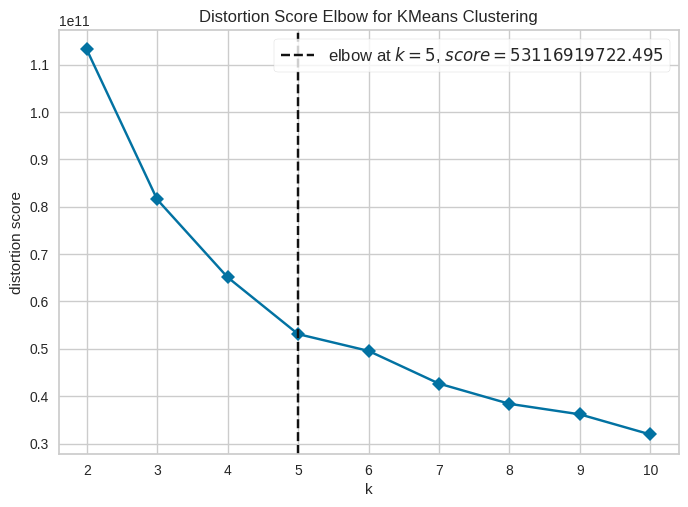

In [70]:
plot_model(KMeanCluster, plot = 'elbow')

In [71]:
plot_model(KMeanCluster, plot = 'tsne')

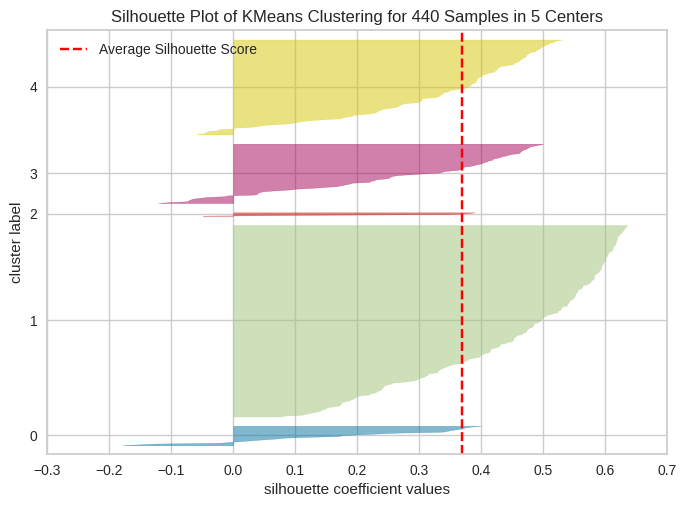

In [72]:
plot_model(KMeanCluster, plot = 'silhouette')

In [73]:
plot_model(KMeanCluster, plot = 'distribution')

#DATA PREPROCESSING

NORMALISATION

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3478,130.9300,1.2377,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

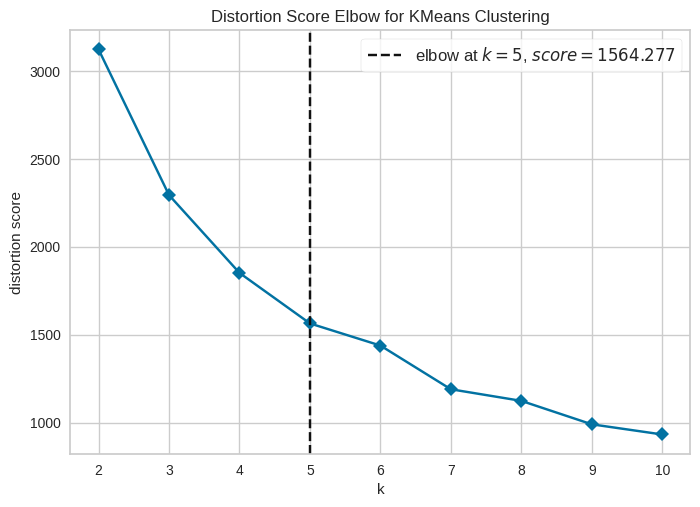

In [74]:
setup(data = p, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [75]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3068,116.7019,1.2732,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3478,130.9300,1.2377,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3479,135.9637,0.9440,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#TRANSFORMATION

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5166,15152.3284,0.6219,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

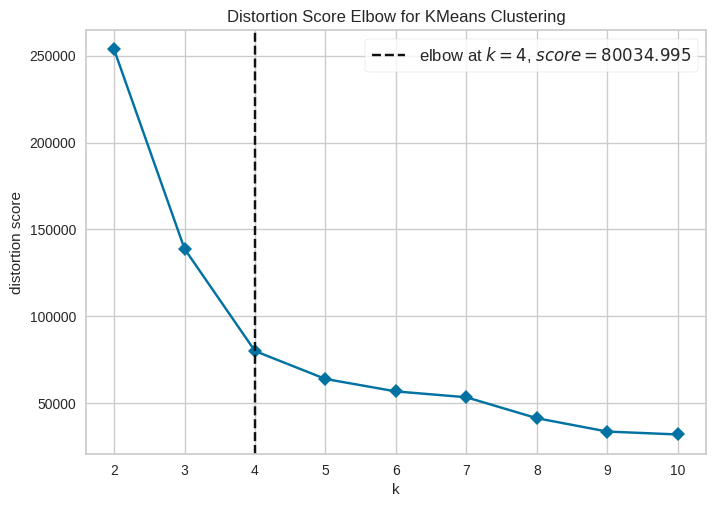

In [76]:
setup(data = p, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [77]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8554,13039.7633,0.3389,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5166,15152.3284,0.6219,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4690,14214.7433,0.6833,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3878,188.9498,0.8884,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

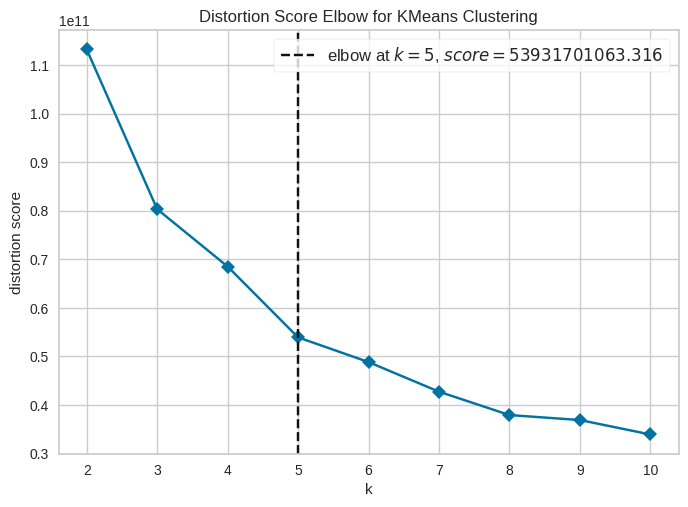

In [78]:
setup(data = p, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [79]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4784,210.1526,0.8895,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3878,188.9498,0.8884,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3768,209.0325,0.9069,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# "Transformation" + "Normalization"




,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

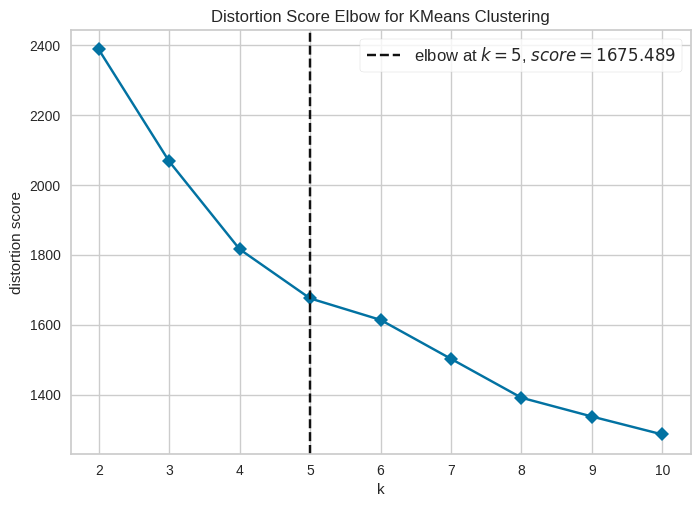

In [80]:
setup(data = p, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [81]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2200,153.4620,1.6449,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2232,119.7207,1.4402,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#"Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

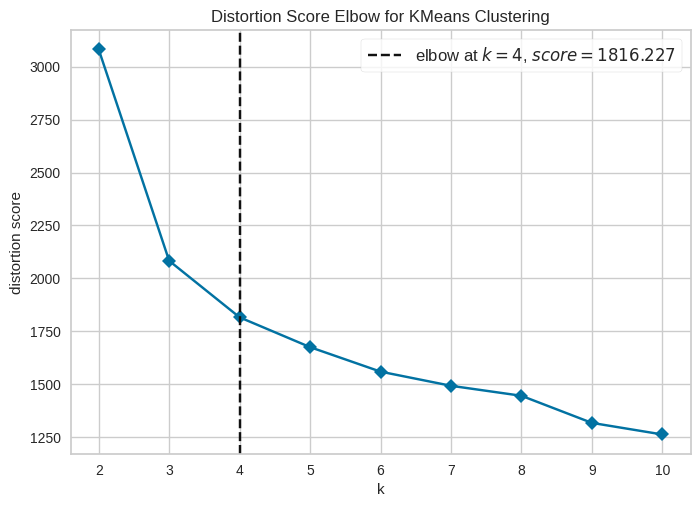

In [82]:
setup(data = p, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [83]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2528,150.7137,1.5429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2472,136.3349,1.4208,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2231,119.7180,1.4411,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
evaluate_model(KMeanCluster)